# Explore the representation of reality of a MLP during its training

In [6]:
# from experiment import MLP_in_training
# MLP_in_training()

In [1]:
import json

with open("inTraining.json", "r") as file:
    raw_data = json.load(file)

data = raw_data
data

[[[[0.9887311181924482,
    8.01162895045929e-07,
    0.000384847960724729,
    0.0015248800391664593,
    1.9586846884284804e-06,
    0.011196978356497776,
    0.00232521542723411,
    0.0012979091524958756,
    0.0003532614972255808,
    0.000303217334172973],
   [0.9723861631212343,
    6.533873076341518e-07,
    0.003232423835922199,
    0.0015542813563484339,
    6.830443385016502e-05,
    0.0013529199019854743,
    1.510170913447104e-05,
    0.0002557477095682609,
    0.0009538040015538717,
    0.002038900372991259],
   [0.9950330181793144,
    1.7251510016949434e-06,
    0.0015299878350227458,
    0.00011170353723948766,
    4.899689839324239e-05,
    0.005790018556414196,
    5.008161136327766e-06,
    0.003537032734781815,
    0.003099302223410772,
    0.0004709289384776676],
   [0.9936578536176724,
    3.6409998984915305e-06,
    0.0004678441962603926,
    4.2476662237425535e-07,
    0.0007477430482802993,
    0.0033687287329141726,
    0.00361546630731596,
    0.000532934307

In [2]:
# Measure the assymetry of the distances
# put the average class values in an adjacency matrix
import numpy as np
epoch_mean_classes_values = []
for epoch in range(len(data)):
    mean_classes_values = []
    for i in range(10):
        # Grab the data for the input image class from the dataset
        input_class = data[epoch][i]
        # container to hold the mean certainties for the class
        mean_certainties = []
        for j in range(10):
            # container to hold the raw certainty data for each classification 0-9
            class_certainties = []
            for sample in input_class:
                class_certainties.append(sample[j])
            # Compute the average certainty of each classification across all samples
            mean_certainties.append(np.mean(class_certainties))
        mean_classes_values.append(mean_certainties)
    epoch_mean_classes_values.append(mean_classes_values)


In [3]:
# use this adjacency matrix to compute the assymetry of the distances: say 9 to 4 and 4 to 9
import math
epoch_distances = []
for epoch in range(len(epoch_mean_classes_values)):
    distances = []
    for i in range(10):
        for j in range(10):
            if(i!=j):
                ab = epoch_mean_classes_values[epoch][i][j]
                ba = epoch_mean_classes_values[epoch][j][i]
                distances.append((1-ab, 1-ba))

    assymetry = [np.abs(a - b) for a, b in distances]
    epoch_distances.append((np.mean(assymetry), np.sum(assymetry)))

epoch_distances

[(0.013770581308226972, 1.2393523177404275),
 (0.01298776091818671, 1.1688984826368038),
 (0.01411861253626884, 1.2706751282641955),
 (0.010665998766528996, 0.9599398889876096),
 (0.006182845114887527, 0.5564560603398774),
 (0.006283666988555907, 0.5655300289700316),
 (0.007421957937677252, 0.6679762143909527),
 (0.007843193312245056, 0.705887398102055),
 (0.007136548212429935, 0.6422893391186941),
 (0.007837621962908417, 0.7053859766617576)]

Looks like over the course of the epochs the mean assymetry goes down from 0.01 to 0.007 and hovers there, and the sum of the assymetry goes down from 1.2 to 0.7 and hovers there. This is encouraging for assuming that the distances between classes are symmetric so we can use PCA

In [4]:
# define the distance between classes to be 1 - certainty
epoch_distances = [[[1-val for val in class_vals] 
                    for class_vals in epoch_mean_classes_values[epoch]] 
                    for epoch in range(len(epoch_mean_classes_values))]
epoch_distances

[[[0.11263699747492295,
   0.9999911160354704,
   0.979867573083556,
   0.9918098409849575,
   0.9973554414293639,
   0.9713195649830056,
   0.9904707093170748,
   0.993607744127073,
   0.9933687213486156,
   0.997614131821899],
  [0.9999993961620568,
   0.017360778101474406,
   0.9966612577378043,
   0.9755990781378535,
   0.9992165036072441,
   0.9974679753219703,
   0.9977850672041663,
   0.9884839593856403,
   0.9827057949296099,
   0.9968043063646268],
  [0.9839819928574014,
   0.9750430473457861,
   0.24564637613110263,
   0.9258520012436231,
   0.9927912955848265,
   0.9960148659599698,
   0.9940376213536142,
   0.9712258229136997,
   0.9431388656038128,
   0.9977340237948983],
  [0.9990571403676338,
   0.992088958450963,
   0.9768314417877815,
   0.18838729602716697,
   0.9963288575816308,
   0.9205362282868651,
   0.9961435197578926,
   0.9798107827572748,
   0.9784197232039898,
   0.9927400912331419],
  [0.9975068248845456,
   0.9871219168876949,
   0.9967629120296724,
   0.9

Explained Variance Ratio: [0.13607571 0.12882696]


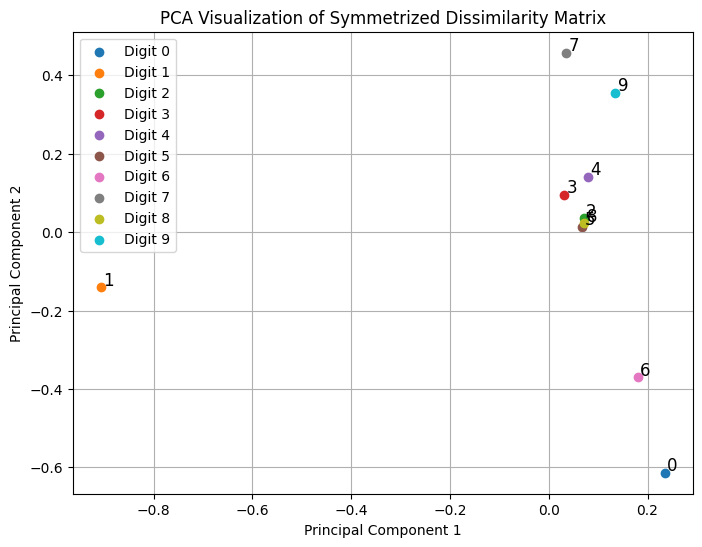

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -------------------------------
# Step 0: Define Your Dissimilarity Matrix
# -------------------------------
# Replace the following with your actual 10x10 matrix of distances.
# Here we use a dummy matrix for illustration.
D = np.array(epoch_distances[7])
# -------------------------------
# Step 1: Symmetrize the Matrix
# -------------------------------
# Since PCA requires a symmetric (and ideally Euclidean) representation, we symmetrize D.
D_sym = (D + D.T) / 2
# use this adjacency matrix to compute the assymetry of the distances: say 9 to 4 and 4 to 9
import math
distances = []
for i in range(10):
    for j in range(10):
        if(i!=j):
            distances.append((D_sym[i][j], D_sym[j][i]))
# -------------------------------
# Step 2: Form Feature Vectors from the Matrix Rows
# -------------------------------
# Each row of D_sym is a 10-dimensional vector that represents the relationship of that digit with all digits.
X = D_sym

# -------------------------------
# Step 3: Apply PCA to Reduce to 2 Dimensions
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# -------------------------------
# Step 4: Visualize the 2D Representation
# -------------------------------
plt.figure(figsize=(8, 6))
for i in range(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], label=f"Digit {i}")
    # Annotate each point with its corresponding digit label
    plt.text(X_pca[i, 0] + 0.005, X_pca[i, 1] + 0.005, str(i), fontsize=12)
    
plt.title("PCA Visualization of Symmetrized Dissimilarity Matrix")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend()
plt.show()